In [4]:
import imdlib as imd

"""
# install imdlib python library
# you should be connected to internet for downloading the data
#-9999 value is for no data in saved csv file
# This code will convert the IMD gridded data to csv file
if you have data already downloaded then create folder named rain/tmax/tmin inside any folder and
copy yearly data files in the respective folder and rename yearly data file as year name i.e 1951.GRD 1952.GRD etc and
comment the line imd.get_data(variable,start_yr) and run the code it will convert the binary .GRD data into csv file
"""
start_yr = 2015  # give starting year from which you want to download/convert data: 1901 ownwards for rainfall, 1951 for tmax and tmin
end_yr = 2016  # give ending year upto which you want to download/convert data
variable = "tmax"  # give variable name (rain for rainfall at 0.25 deg, tmax or tmin for rainfall, min or max temperature at 1 deg resolution)
file_format = (
    "yearwise"  # other option (None), which will assume deafult imd naming convention
)
file_dir = "/home/wubu/space/cud/akash/imd_data"  # this path should be same as mentioned in previous line
data = imd.open_data(
    variable, start_yr, end_yr, "yearwise", file_dir
)  # this will open the data downloaded and saved in the location mentioned in previous line
if variable == "rain":
    grid_size = 0.25  # grid spacing in deg
    y_count = 129  # no of grids in y direction
    x_count = 135  # no of grids in x direction
    x = 66.5  # starting longitude taken from control file (.ctl)
    y = 6.5  # starting latitude taken from control file (.ctl)
elif variable == "tmax" or variable == "tmin":
    grid_size = 1  # grid spacing in deg
    y_count = 31  # no of grids in y direction
    x_count = 31  # no of grids in x direction
    x = 67.5  # starting longitude taken from control file (.ctl)
    y = 7.5  # starting latitude taken from control file (.ctl)

# print(grid_size,x_count, y_count, x, y)
data
data.shape
np_array = data.data
# print(np_array[0,0,0])
# xr_objecct = data.get_xarray()
# type(xr_objecct)
# xr_objecct.mean('time').plot()
years_no = (end_yr - start_yr) + 1
# print(years_no)
day = 0
for yr in range(0, years_no):
    f = open(
        "E:/imd_data/" + str(start_yr + yr) + "_" + str(variable) + ".csv", "w"
    )  # just change the path where you want to save csv file
    if ((start_yr + yr) % 4 == 0) and (
        (start_yr + yr) % 100 != 0
    ):  # check for leap year
        days = 366
        count = yr + days
    elif (
        ((start_yr + yr) % 4 == 0)
        and ((start_yr + yr) % 100 == 0)
        and ((start_yr + yr) % 400 == 0)
    ):
        days = 366
        count = yr + days
    else:
        days = 365
        count = yr + days

    day = day + days

    f.write("X,Y,")
    for d in range(0, days):
        f.write(str(d + 1))
        f.write(",")
    f.write("\n")
    # print(np_array[364,0,0])
    for j in range(0, y_count):

        for i in range(0, x_count):

            f.write(str((i * grid_size) + x))
            f.write(",")
            f.write(str((j * grid_size) + y))
            f.write(",")
            time = 0
            for k in range(day - days, day):

                val = np_array[k, i, j]
                if val == 99.9000015258789 or val == -999:
                    f.write(str(-9999))
                    f.write(",")
                else:
                    f.write(str(val))
                    f.write(",")

            f.write("\n")
    print("File for " + str(start_yr + yr) + "_" + str(variable) + " is saved")
print("CSV conversion successful !")

Exception: Error in file reading,mismatch in size of data-length

In [ ]:
with open("/home/wubu/space/cud/akash/imd_data/2001.grd", "rb") as file:
    # Skip header if necessary (example skips first 100 bytes)
    # file.read(100) # Uncomment and adjust based on your file's format

    # Read the data into a numpy array
    data = np.fromfile(file, dtype=data_type)

In [5]:
import imdlib as imd

start_yr = 2010
end_yr = 2018
variable = "rain"  # other options are ('tmin'/ 'tmax')
data = imd.get_data(variable, start_yr, end_yr, fn_format="yearwise")

Downloading: rain for year 2010
Downloading: rain for year 2011
Downloading: rain for year 2012
Downloading: rain for year 2013
Downloading: rain for year 2014
Downloading: rain for year 2015
Downloading: rain for year 2016
Downloading: rain for year 2017
Downloading: rain for year 2018
Download Successful !!!


In [6]:
print(data)

In [7]:
ds = data.get_xarray()
print(ds)

<xarray.Dataset> Size: 458MB
Dimensions:  (time: 3287, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 1kB 6.5 6.75 7.0 7.25 7.5 ... 37.75 38.0 38.25 38.5
  * lon      (lon) float64 1kB 66.5 66.75 67.0 67.25 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 26kB 2010-01-01 2010-01-02 ... 2018-12-31
Data variables:
    rain     (time, lat, lon) float64 458MB -999.0 -999.0 ... -999.0 -999.0
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2024-03-30 05:31:58.334541 Python
    references:   
    comment:      
    crs:          epsg:4326


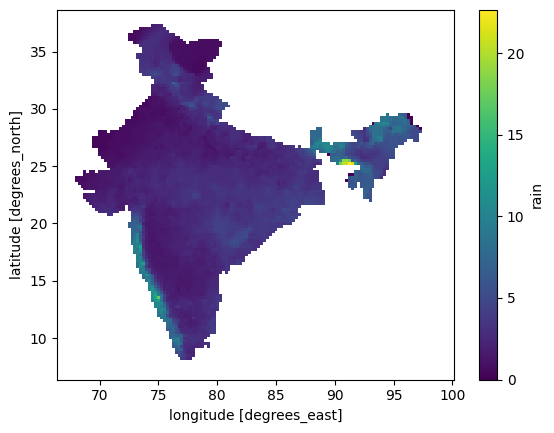

In [8]:
ds = ds.where(ds["rain"] != -999.0)  # Remove NaN values
ds["rain"].mean("time").plot()

In [9]:
import imdlib as imd
import pandas as pd

start_yr = 2010
end_yr = 2018
variable = "rain"  # Options: 'rain', 'tmin', 'tmax'

# Fetch the data
data = imd.get_data(variable, start_yr, end_yr, fn_format="yearwise")

# Create a new Excel writer object
writer = pd.ExcelWriter("weather_data.xlsx", engine="xlsxwriter")

for year in range(start_yr, end_yr + 1):
    # Assuming 'data' is a dictionary-like object where each key is a year
    # Convert the year's data to a pandas DataFrame
    df = pd.DataFrame(data[year])

    # Write the DataFrame to a separate sheet named after the year
    df.to_excel(writer, sheet_name=str(year))

# Save and close the Excel workbook
writer.save()

Downloading: rain for year 2010
Downloading: rain for year 2011
Downloading: rain for year 2012
Downloading: rain for year 2013
Downloading: rain for year 2014
Downloading: rain for year 2015
Downloading: rain for year 2016
Downloading: rain for year 2017
Downloading: rain for year 2018
Download Successful !!!


TypeError: 'IMD' object is not subscriptable

In [11]:
lat = 20.03
lon = 77.23
data.to_csv('test.csv', lat, lon, file_dir)